<a href="https://colab.research.google.com/github/BautistaDavid/Team-1-Machine-Learning/blob/main/Proyecto_final_parte2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 2: Aprendizaje No Supervisado** 
##  **PCA Datos crecimiento Diario Acciones de empresas DowJones**

In [1]:
install.packages('readxl')
install.packages('corrplot')
install.packages('FactoMineR')
install.packages('factoextra')
install.packages('plotrix')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(data.table)
library(readxl)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(plotrix)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


corrplot 0.90 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### **Datos**

Se cargan los datos preprocesados con el lenguaje ```python``` por medio de la libreria ```data.table```. 


In [3]:
url="https://raw.githubusercontent.com/BautistaDavid/Team-1-Machine-Learning/main/Trabajo%20Final/datos_acciones.csv"
datos <- fread(url)

In [4]:
head(datos,3)

V1,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,⋯,29/06/2021,30/06/2021,01/07/2021,02/07/2021,06/07/2021,07/07/2021,08/07/2021,09/07/2021,12/07/2021,13/07/2021
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AXP,0.005337174,0.03699334,-0.011376564,0.0009863554,-0.005912301,0.004625805,0.006413419,0.01127451,-0.01316852,⋯,0.005966514,0.010349210,0.009344675,0.006290801,0.008374617,-0.020353258,0.02650746,0.009654531,-0.005645161,-0.0005793071
AMGN,0.004853084,0.02410432,0.003301179,0.0191009315,-0.003857604,-0.004125100,0.004860730,0.01648860,0.01584871,⋯,0.005320465,0.012923077,0.007290401,-0.020305589,-0.001764827,0.004358194,0.00376617,-0.003384992,0.001882391,-0.0005309807
AAPL,0.012363805,-0.03366155,0.034123223,0.0086312252,-0.023248769,-0.001395565,0.016226708,-0.01512721,-0.01373051,⋯,0.004621140,0.002263435,0.019596416,0.014718491,0.017955218,-0.009199696,0.01305501,-0.004203708,0.007889273,0.0241005218


* Se transforma la columna ```V1``` a indice del DataFrame para poder incluir esta infromacion dentro edl algortimo de analisis de componentes principales (**PCA**).

In [5]:
datos<-datos %>% column_to_rownames(., var = "V1")

In [6]:
head(datos)

,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,⋯,29/06/2021,30/06/2021,01/07/2021,02/07/2021,06/07/2021,07/07/2021,08/07/2021,09/07/2021,12/07/2021,13/07/2021
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AXP,0.005337174,0.036993343,-0.011376564,0.0009863554,-0.005912301,0.004625805,0.0064134188,0.011274510,-0.01316852,0.037658616,⋯,0.005966514,0.0103492102,0.009344675,0.006290801,0.008374617,-0.020353258,0.02650746,0.009654531,-0.005645161,-0.0005793071
AMGN,0.004853084,0.024104320,0.003301179,0.0191009315,-0.003857604,-0.004125100,0.0048607295,0.016488601,0.01584871,0.011324290,⋯,0.005320465,0.0129230769,0.007290401,-0.020305589,-0.001764827,0.004358194,0.00376617,-0.003384992,0.001882391,-0.0005309807
AAPL,0.012363805,-0.033661553,0.034123223,0.0086312252,-0.023248769,-0.001395565,0.0162267081,-0.015127206,-0.01373051,0.005427088,⋯,0.004621140,0.0022634346,0.019596416,0.014718491,0.017955218,-0.009199696,0.01305501,-0.004203708,0.007889273,0.0241005218
BA,0.043952249,-0.002835137,0.007960953,-0.0132104744,-0.014816579,0.007834035,-0.0057578811,0.013030259,-0.02663046,0.031274471,⋯,0.016118086,0.0007096343,-0.012722646,-0.002281562,-0.018463623,0.021529036,0.01191029,-0.005425936,-0.042343363,-0.0164329535
CAT,0.008180071,0.055652363,0.001908594,0.0001544561,-0.002059096,0.018982771,-0.0083527387,0.007708408,-0.01408308,-0.002877402,⋯,0.011761971,-0.0042273584,0.004845185,-0.019470977,0.005479580,-0.012017327,0.02503418,0.005335296,-0.015509196,-0.0164970491
CVX,0.027033408,0.032183908,0.004677060,0.0095322545,0.005709267,0.018995633,-0.0009642168,0.024021448,-0.03560582,0.026278640,⋯,0.009444873,0.0140347527,-0.001318143,-0.019609692,-0.010193288,-0.003206062,0.01432749,0.002017873,-0.003356348,-0.0188588473


### **Algoritmo PCA** 

Se usa la libreria ```FactoMineR``` para plantear el Analsis de componentes principales sobre los datos importados.

In [7]:
res.pca = FactoMineR::PCA(datos, scale.unit = TRUE, graph = F)

Se visualiza la proporción de varianza explicada por cada una de las componentes y así mismo el acumulado de estas.

In [8]:
res.pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,26.456991,20.0431751,20.04318
comp 2,16.727893,12.6726465,32.71582
comp 3,11.006268,8.3380821,41.05390
comp 4,8.690063,6.5833812,47.63728
comp 5,7.300507,5.5306872,53.16797
comp 6,7.119181,5.3933188,58.56129
comp 7,6.138181,4.6501375,63.21143
comp 8,5.531005,4.1901551,67.40158
comp 9,5.127592,3.8845392,71.28612
comp 10,4.410145,3.3410186,74.62714


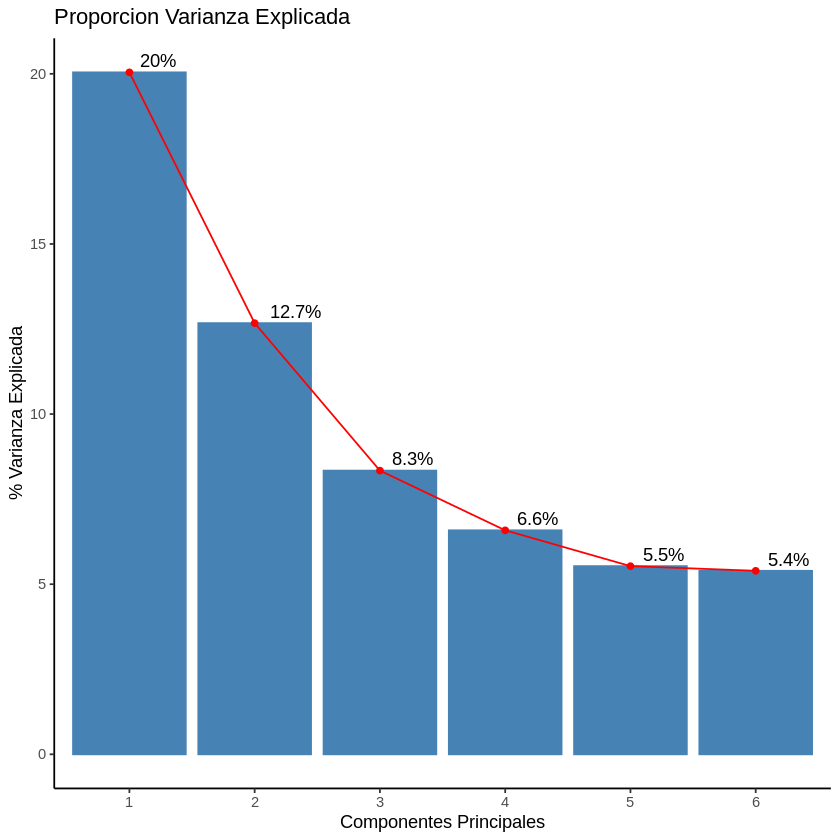

In [9]:
grafica<-factoextra::fviz_screeplot(res.pca, ncp = 6,
                                    linecolor="red",addlabels=TRUE, hjust = -0.3,
                                    main="Proporcion Varianza Explicada",
                                    x="Componentes Principales",y="% Varianza Explicada",
                                    )                                     
grafica + theme_classic()

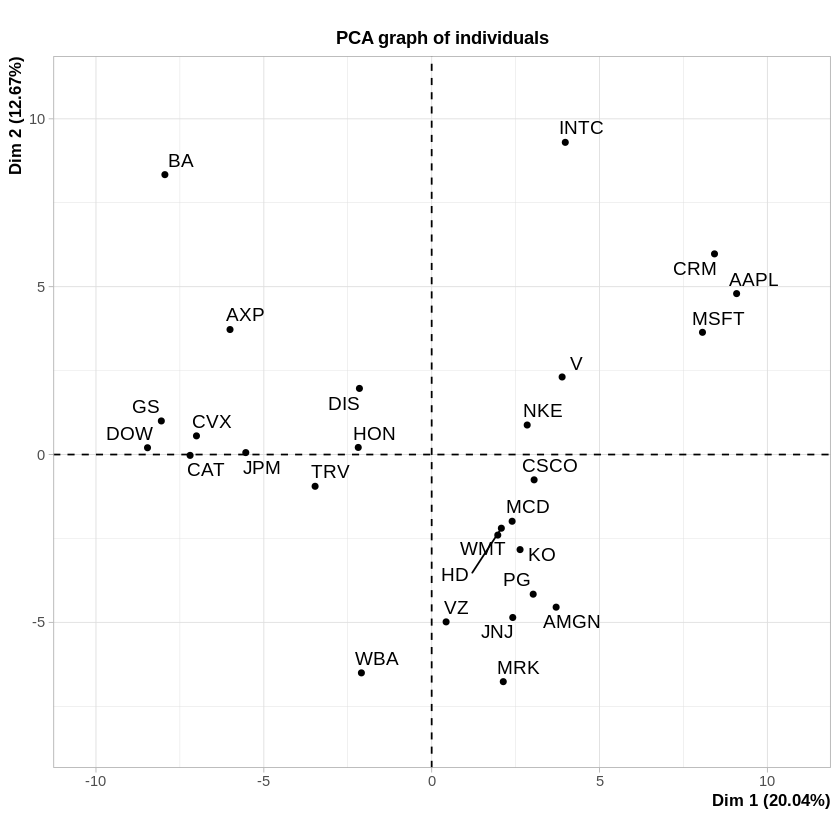

In [10]:
FactoMineR::plot.PCA(res.pca, axes = c(1,2), choix = "ind")

In [11]:
res.pca$ind$coord

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
AXP,-6.0069314,3.72331643,4.0081355,0.01334456,-1.237790343
AMGN,3.7071016,-4.54644552,-1.9010737,2.31513449,-2.495433123
AAPL,9.0831060,4.79340250,-0.5124284,1.41001259,3.423083203
BA,-7.9471523,8.33705021,-10.4700414,-5.31614870,-2.426067046
CAT,-7.1964256,-0.02533068,0.6044036,1.59427800,-1.853043777
CVX,-7.0062529,0.55562307,1.4855310,5.77335581,-3.031308483
CSCO,3.0514460,-0.75392590,0.8222927,0.26847107,1.001938089
KO,2.6328123,-2.83210480,1.3413062,-0.86500651,-1.837225167
DIS,-2.1522392,1.96904440,1.3489331,-5.72328773,-2.641578841
DOW,-8.4648316,0.20236238,3.6011825,3.39685322,3.058585475


* Se obtiene una matriz con los valores que representan la cantidad de cada variable dentro de cada dimension, la cual sera usada posteriormente para relizar un modelo supervisado SVM

In [13]:
datos_coord<-res.pca$ind$coord
head(datos_coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
AXP,-6.006931,3.72331643,4.0081355,0.01334456,-1.237790
AMGN,3.707102,-4.54644552,-1.9010737,2.31513449,-2.495433
AAPL,9.083106,4.79340250,-0.5124284,1.41001259,3.423083
BA,-7.947152,8.33705021,-10.4700414,-5.31614870,-2.426067
CAT,-7.196426,-0.02533068,0.6044036,1.59427800,-1.853044
CVX,-7.006253,0.55562307,1.4855310,5.77335581,-3.031308


In [14]:
write.csv(datos_coord,"Datos_coord.csv")

In [15]:
#print(res.pca$var$coord)